In [1]:
!pip install cirq

     |████████████████████████████████| 1.4MB 2.8MB/s 
     |████████████████████████████████| 1.2MB 18.5MB/s 
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


In [0]:
import cirq
from cirq.contrib.svg import SVGCircuit
import numpy as np
from math import sin, cos, atan2
import matplotlib.pyplot as plt
from numpy.linalg import norm,svd
import sympy

In [0]:
def state_prep(ckt,qubits,A,q):
    if q==1:
      ckt.append(cirq.rz(2*atan2(A[1],A[0])).on(qubits[0]))
      return ckt
    
    n=q-q//2 #n>=m
    m=q//2
    A=np.reshape(A,(2**m,2**n))
    A=np.transpose(A)
    
    U,S,V=np.linalg.svd(A)
    ckt=state_prep(ckt,qubits[:q//2],S,q//2)
    
    for i in range(m):
        ckt.append(cirq.CNOT(qubits[i],qubits[i+n]))
    if q%2==1:
        ckt.append(cirq.CNOT(qubits[q//2],qubits[q-1]))
    
    ckt.append(cirq.MatrixGate(U).on(*qubits[:n]))
    ckt.append(cirq.MatrixGate(np.transpose(V)).on(*qubits[n:]))
    print(q,"Q   done")
    return ckt

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


2 Q   done
4 Q   done


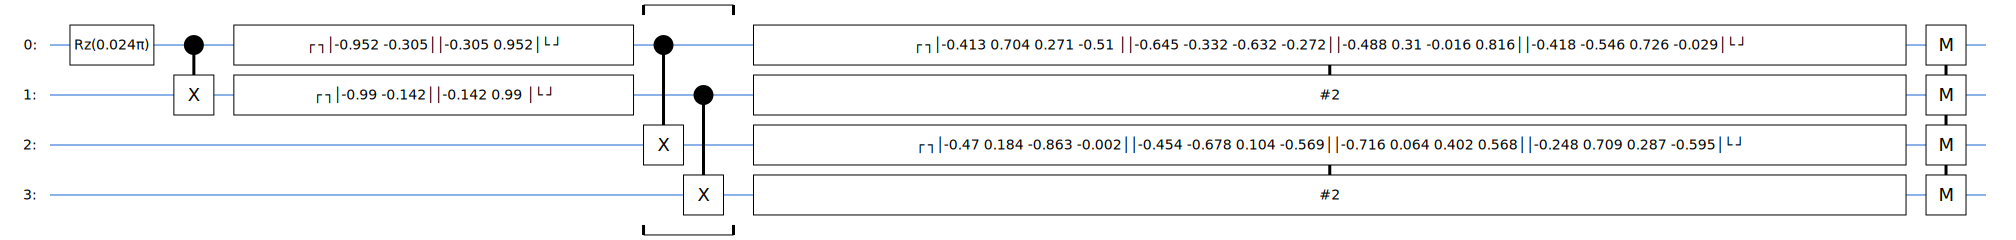

In [4]:
q=4
n=q-q//2 #n>=m
m=q//2

A=np.random.rand(2**q)
A=A/np.linalg.norm(A)

qubits = cirq.LineQubit.range(q)
circuit = cirq.Circuit()

circuit=state_prep(circuit,qubits,A,q)
circuit.append(cirq.measure(*qubits))
SVGCircuit(circuit)

In [0]:
print(A)

sim=cirq.Simulator()
result=sim.run(circuit,repetitions=10)
print(result)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0,1,2,3=0000000000, 0000000000, 0000000000, 0000000000


In [15]:
q=4

A=np.random.rand(2**q,2**q)
U,S,V=np.linalg.svd(A)

qubits = cirq.LineQubit.range(q)
circuit = cirq.Circuit()
circuit2 = cirq.Circuit()

circuit.append(cirq.MatrixGate(U).on(*qubits))
#circuit.append(cirq.QFT(*qubits))

circuit2.append(cirq.decompose(circuit))

SVGCircuit(circuit2)

In [16]:
cirq.decompose(circuit2)

[cirq.MatrixGate(np.array([[-0.27947680262009134, 0.14509177103231535, -0.3551074500951284, -0.13354952770342415, 0.06017164385724337, -0.015364581765330128, 0.46878135770183194, 0.281267625831176, 0.3483803540595899, -0.010184221934875004, 0.12529345735107705, 0.24025438163043122, 0.031410260197595144, -0.21580431341810757, -0.10077500776632553, -0.44896911408441353], [-0.23417462035934136, -0.6757386720986939, -0.01583626280651331, 0.09829308592310716, 0.05442746639011001, 0.07849818888535123, -0.07051554654158532, 0.04185422092531213, -0.2589941651706819, 0.2459618356933114, -0.19024241585883758, 0.34251608936503025, -0.07017131089082493, -0.3920674186587234, 0.14090848514452767, -0.05655013769443732], [-0.24607056820690118, -0.19219822195608843, 0.1602015066922839, 0.052702614310505144, -0.06918885380225648, -0.1165321631278313, -0.25867980616929886, 0.15712801229856768, 0.38980780070123183, 0.17584871721327136, 0.010492133127487854, -0.6527604992229225, -0.2793478291855891, -0.169